# Chase Bank Deposit Analysis

## by Justin Sierchio

In this analysis, we will be looking at deposits in various Chase Bank locations across the United States from the years 2010 to 2016. Ideally, we would like to be able to answer the following questions:

<ul>
    <li>Where do Chase customers deposit the most money?</li>
    <li>How have the deposits changed over time with respect to location?</li>
    <li>What are some other conclusions we might able to draw from this analysis?</li>
</ul>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/chasebank/bank-deposits/download. More information related to the dataset can be found at: https://www.kaggle.com/chasebank/bank-deposits.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_CHASE = pd.read_csv("database.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from Chase Bank dataset
df_CHASE.head()

,Institution Name,Main Office,Branch Name,Branch Number,Established Date,Acquired Date,Street Address,City,County,State,Zipcode,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
0,JPMorgan Chase Bank,1,JPMorgan Chase Bank Main Office,0,01/01/1824,NaN,1111 Polaris Parkway,Columbus,Delaware,OH,43240,40.14453,-82.99115,633131000.0,743268000.0,832455000.0,916543000.0,1.032549e+09,1.069425e+09,1155185000
1,JPMorgan Chase Bank,0,Vernon Hills Scarsdale Branch,2,03/20/1961,NaN,676 White Plains Road,Scarsdale,Westchester,NY,10583,40.97008,-73.80670,293229.0,310791.0,325742.0,327930.0,3.277920e+05,3.414750e+05,381558
2,JPMorgan Chase Bank,0,Great Neck Northern Boulevard Branch,3,09/09/1963,NaN,410 Northern Boulevard,Great Neck,Nassau,NY,11021,40.77944,-73.72240,191011.0,206933.0,216439.0,237983.0,2.341830e+05,2.624550e+05,278940
3,JPMorgan Chase Bank,0,North Hartsdale Branch,4,02/19/1966,NaN,353 North Central Avenue,Hartsdale,Westchester,NY,10530,41.02654,-73.79168,87110.0,88367.0,93163.0,109659.0,1.119850e+05,1.167720e+05,140233
4,JPMorgan Chase Bank,0,Lawrence Rockaway Branch,5,01/16/1965,NaN,335 Rockaway Turnpike,Lawrence,Nassau,NY,11559,40.62715,-73.73675,172608.0,172749.0,189413.0,198445.0,2.051980e+05,2.232000e+05,235594


Let's describe what each of the columns in this dataset mean.

<ul>
    <li>Institution Name: name of the financial institution</li>
    <li>Main Office: Whether the branch is the main office</li>
    <li>Branch Name: Name of Chase Bank branch</li>
    <li>Branch Number: Number of branch</li>
    <li>Established Date: Date branch was established</li>
    <li>Acquired Date: Date branch was acquired by Chase</li>
    <li>Street Address: Self-Explanatory</li>
    <li>City: Self-Explanatory</li>
    <li>County: Self-Explanatory</li>
    <li>State: Self-Explanatory</li>
    <li>Zipcode: Self-Explanatory</li>
    <li>Latitude: Self-Explanatory</li>
    <li>Longitude: Self-Explanatory</li>
    <li>2010 Deposits: Deposits during CY 2010</li>
    <li>2011 Deposits: Deposits during CY 2010</li>
    <li>2012 Deposits: Deposits during CY 2010</li>
    <li>2013 Deposits: Deposits during CY 2010</li>
    <li>2014 Deposits: Deposits during CY 2010</li>
    <li>2015 Deposits: Deposits during CY 2010</li>
    <li>2016 Deposits: Deposits during CY 2010</li>
</ul>

## Data Cleaning

First, let's get a sense of the quality of the dataset.

In [4]:
# Characteristics of the Chase Bank dataset
df_CHASE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5413 entries, 0 to 5412
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Institution Name  5413 non-null   object 
 1   Main Office       5413 non-null   int64  
 2   Branch Name       5413 non-null   object 
 3   Branch Number     5413 non-null   int64  
 4   Established Date  5413 non-null   object 
 5   Acquired Date     3798 non-null   object 
 6   Street Address    5413 non-null   object 
 7   City              5413 non-null   object 
 8   County            5413 non-null   object 
 9   State             5413 non-null   object 
 10  Zipcode           5413 non-null   int64  
 11  Latitude          5347 non-null   float64
 12  Longitude         5347 non-null   float64
 13  2010 Deposits     4673 non-null   float64
 14  2011 Deposits     4835 non-null   float64
 15  2012 Deposits     5084 non-null   float64
 16  2013 Deposits     5238 non-null   float64


First, let's check the institution name to see if there are any deviations.

In [5]:
# Check Chase Institution Name Values
df_CHASE['Institution Name'].value_counts()

JPMorgan Chase Bank    5413
Name: Institution Name, dtype: int64

Since there are no other institution names other than JPMorgan Chase Bank, let us go ahead and drop that column from the data set.

In [6]:
# Drop Institution Name from Chase Bank Dataset
df_CHASE2 = df_CHASE.drop(['Institution Name'], axis=1)
df_CHASE2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5413 entries, 0 to 5412
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Main Office       5413 non-null   int64  
 1   Branch Name       5413 non-null   object 
 2   Branch Number     5413 non-null   int64  
 3   Established Date  5413 non-null   object 
 4   Acquired Date     3798 non-null   object 
 5   Street Address    5413 non-null   object 
 6   City              5413 non-null   object 
 7   County            5413 non-null   object 
 8   State             5413 non-null   object 
 9   Zipcode           5413 non-null   int64  
 10  Latitude          5347 non-null   float64
 11  Longitude         5347 non-null   float64
 12  2010 Deposits     4673 non-null   float64
 13  2011 Deposits     4835 non-null   float64
 14  2012 Deposits     5084 non-null   float64
 15  2013 Deposits     5238 non-null   float64
 16  2014 Deposits     5357 non-null   float64


We can see that some banks did not take in deposits from 2010 to 2015. This is perhaps because they had not been acquired or established by Chase until that point. In order to clean that data, let us convert all the 'NULL' values for the 2010, 2011, 2012, 2013, 2014, 2015 and 2016 deposits to '$0 dollars.'

In [7]:
# Convert 'NULL' values in deposit columns to 0
df_CHASE2['2010 Deposits'].fillna(0, inplace = True)
df_CHASE2['2011 Deposits'].fillna(0, inplace = True)
df_CHASE2['2012 Deposits'].fillna(0, inplace = True)
df_CHASE2['2013 Deposits'].fillna(0, inplace = True)
df_CHASE2['2014 Deposits'].fillna(0, inplace = True)
df_CHASE2['2015 Deposits'].fillna(0, inplace = True)
df_CHASE2['2016 Deposits'].fillna(0, inplace = True)
df_CHASE2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5413 entries, 0 to 5412
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Main Office       5413 non-null   int64  
 1   Branch Name       5413 non-null   object 
 2   Branch Number     5413 non-null   int64  
 3   Established Date  5413 non-null   object 
 4   Acquired Date     3798 non-null   object 
 5   Street Address    5413 non-null   object 
 6   City              5413 non-null   object 
 7   County            5413 non-null   object 
 8   State             5413 non-null   object 
 9   Zipcode           5413 non-null   int64  
 10  Latitude          5347 non-null   float64
 11  Longitude         5347 non-null   float64
 12  2010 Deposits     5413 non-null   float64
 13  2011 Deposits     5413 non-null   float64
 14  2012 Deposits     5413 non-null   float64
 15  2013 Deposits     5413 non-null   float64
 16  2014 Deposits     5413 non-null   float64


At next glance, we can see that it appears that 3798 of the 5413 Chase branches were acquired by the main financial institution. 

The data appears to be sufficiently clean for conducting exploratory data analysis.

## Exploratory Data Analysis

As an initial analysis, let's plot the locations of all the Chase locations for say Texas.

In [8]:
# Create a subset for all the Chase bank branches in Texas
df_CHASE2_TX = df_CHASE2[df_CHASE2['State'].str.match('TX')]
df_CHASE2_TX.head()

,Main Office,Branch Name,Branch Number,Established Date,Acquired Date,Street Address,City,County,State,Zipcode,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
395,0,Houston Main Office,1315,07/03/1912,08/01/2000,712 Main Street,Houston,Harris,TX,77002,29.75917,-95.36334,26356388.0,36991358.0,38794794.0,52284845.0,82408236.0,60702170.0,57820585
396,0,Motor Bank Branch,1318,02/04/1980,08/01/2000,212 Milam Street,Houston,Harris,TX,77002,29.76398,-95.36201,0.0,0.0,0.0,0.0,0.0,0.0,0
397,0,Woodlands Branch,1319,05/17/1972,08/01/2000,25025 Interstate 45 North Freeway,Spring,Montgomery,TX,77380,30.13594,-95.46871,124642.0,191821.0,139133.0,144451.0,158027.0,219354.0,177906
398,0,Detached Drive-In Facility Branch,1320,11/13/1979,08/01/2000,25025 Interstate 45 North Freeway,Spring,Montgomery,TX,77380,30.13594,-95.46871,0.0,0.0,0.0,0.0,0.0,0.0,0
399,0,Stafford Branch,1321,05/29/1956,08/01/2000,11806 Wilcrest Drive,Houston,Harris,TX,77031,29.65071,-95.56772,228748.0,235691.0,283603.0,300138.0,325135.0,331924.0,348054


In [9]:
# Install folium into local Jupyter Notebook
!pip install folium

print('Successfully installed folium package!')

In [10]:
# Create a map of Texas
import folium
TEX_map = folium.Map([31.106, -97.648], zoom_start=6)
TEX_map

Now that we can generate the map, let's mark the Chase locations. But first, we need to remove the locations that do not have latitude or longitude values.

In [11]:
# Remove Locations without Latitude or Longitude values
df_CHASE2_TX = df_CHASE2_TX.dropna()

# Add Chase Locations to Texas Map
for i in range(0,len(df_CHASE2_TX)):
    folium.Marker([df_CHASE2_TX.iloc[i]['Latitude'], df_CHASE2_TX.iloc[i]['Longitude']], 
                  popup=df_CHASE2_TX.iloc[i]['Branch Name']).add_to(TEX_map)

# Re-Display Texas Map
TEX_map

Now that we have shown the Chase Bank branches in Texas, let's take a look at the range of deposits in 2010 by branch in Texas. Then we will compare them to the deposits in 2016.

In [12]:
# Sort all the Chase branches in Texas by 2010 deposits
df_CHASE2_TX_Deposits = df_CHASE2_TX[['Branch Name', 'City', 'County', '2010 Deposits']];
df_CHASE2_TX_Deposits = df_CHASE2_TX_Deposits.sort_values(by=['2010 Deposits'], ascending=False)
print('Top 10 Chase Branches in Texas by Deposits, 2010\n')
print(df_CHASE2_TX_Deposits.head(10))

Top 10 Chase Branches in Texas by Deposits, 2010

                          Branch Name        City   County  2010 Deposits
395               Houston Main Office     Houston   Harris     26356388.0
1167      Downtown Forth Worth Branch  Fort Worth  Tarrant      1551142.0
1088  Austin Downtown Sixth St Branch      Austin   Travis      1165344.0
483         El Paso - Downtown Branch     El Paso  El Paso       487522.0
429      Mcallen Neuhaus Tower Branch     Mcallen  Hidalgo       460270.0
1094            Arlington Main Branch   Arlington  Tarrant       373499.0
414                   Lakeside Branch     Houston   Harris       346672.0
1111    Memorial Drive Houston Branch     Houston   Harris       337761.0
407          Reagan Motor Bank Branch     Houston   Harris       306131.0
1080                   Preston Branch      Dallas   Dallas       288738.0


The result of this inquiry is quite interesting. It turns out that 4 of the top 10 Chase branches (by 2010 deposits) are located in Houston, with the main office branch handling $26,356,388 dollars in deposits. A possible reason for this observation is the plentitude of oil and natural gas companies located in Houston, which could require large amounts of loans and deposits.

In [13]:
# Sort all the Chase branches in Texas by 2016 deposits
df_CHASE2_TX_Deposits = df_CHASE2_TX[['Branch Name', 'City', 'County', '2016 Deposits']];
df_CHASE2_TX_Deposits = df_CHASE2_TX_Deposits.sort_values(by=['2016 Deposits'], ascending=False)
print('Top 10 Chase Branches in Texas by Deposits, 2016\n')
print(df_CHASE2_TX_Deposits.head(10))

Top 10 Chase Branches in Texas by Deposits, 2016

                          Branch Name        City   County  2016 Deposits
395               Houston Main Office     Houston   Harris       57820585
1088  Austin Downtown Sixth St Branch      Austin   Travis        1943526
1167      Downtown Forth Worth Branch  Fort Worth  Tarrant        1713253
414                   Lakeside Branch     Houston   Harris         634501
1080                   Preston Branch      Dallas   Dallas         556700
505        Bellaire At Beltway Branch     Houston   Harris         542050
483         El Paso - Downtown Branch     El Paso  El Paso         469681
429      Mcallen Neuhaus Tower Branch     Mcallen  Hidalgo         451306
410                    Medical Branch     Houston   Harris         449044
407          Reagan Motor Bank Branch     Houston   Harris         432063


Over the 6 year period, we see a dramatic increase in the deposit amounts in the Houston main branch. This would appear to indicate (a) population growth and (b) increasing economic activity. Given that the energy industry picked up in the 2010s, this hypothesis appears to have some merit.

Let's plot the change in deposit amounts for the top 10 recipients in 2010 to get a better sense of the change over the 6 year period.

In [14]:
# Create a Subset for plotting deposit amounts for the Top 10 Branch recipients in Texas
df_CHASE2_TX_Deposits_2010 = df_CHASE2_TX[['2010 Deposits', '2011 Deposits', '2012 Deposits', '2013 Deposits', 
                                          '2014 Deposits', '2015 Deposits', '2016 Deposits']];
df_CHASE2_TX_Deposits_2010 = df_CHASE2_TX_Deposits_2010.sort_values(by=['2010 Deposits'], ascending=False)
df_CHASE2_TX_Deposits_2010_Top10 = df_CHASE2_TX_Deposits_2010.head(10);

# Transpose the Values for making the plots
df_CHASE2_TX_Deposits_2010_Top10_Transpose = df_CHASE2_TX_Deposits_2010_Top10.T
df_CTXTop10 = df_CHASE2_TX_Deposits_2010_Top10_Transpose; #Shorten the Name
df_CTXTop10.columns = ['HOU-Main', 'AUS-6thStreet', 'FW-Downtown', 'HOU-Lakeside', 'DAL-Preston', 'HOU-Bellaire', 
                   'ELP-Downtown', 'MCA-Neuhaus', 'HOU-Medical', 'HOU-ReaganMotor'];

y = df_CTXTop10

# Display Branch Values for Top 10 Deposit Recipients in Plot-Friendly Form
y

,HOU-Main,AUS-6thStreet,FW-Downtown,HOU-Lakeside,DAL-Preston,HOU-Bellaire,ELP-Downtown,MCA-Neuhaus,HOU-Medical,HOU-ReaganMotor
2010 Deposits,26356388.0,1551142.0,1165344.0,487522.0,460270.0,373499.0,346672.0,337761.0,306131.0,288738.0
2011 Deposits,36991358.0,1481645.0,1663634.0,513252.0,488531.0,352625.0,341394.0,370119.0,290563.0,308967.0
2012 Deposits,38794794.0,1741983.0,1741770.0,527654.0,515836.0,385798.0,395232.0,390785.0,329283.0,351154.0
2013 Deposits,52284845.0,1644310.0,1681479.0,579701.0,523621.0,391111.0,462150.0,396658.0,360067.0,408968.0
2014 Deposits,82408236.0,1694211.0,1810582.0,500183.0,485161.0,361445.0,483258.0,402741.0,385679.0,458292.0
2015 Deposits,60702170.0,1633979.0,1732639.0,506428.0,464974.0,375163.0,549594.0,410019.0,409356.0,574505.0
2016 Deposits,57820585.0,1713253.0,1943526.0,469681.0,451306.0,395339.0,634501.0,411449.0,432063.0,556700.0


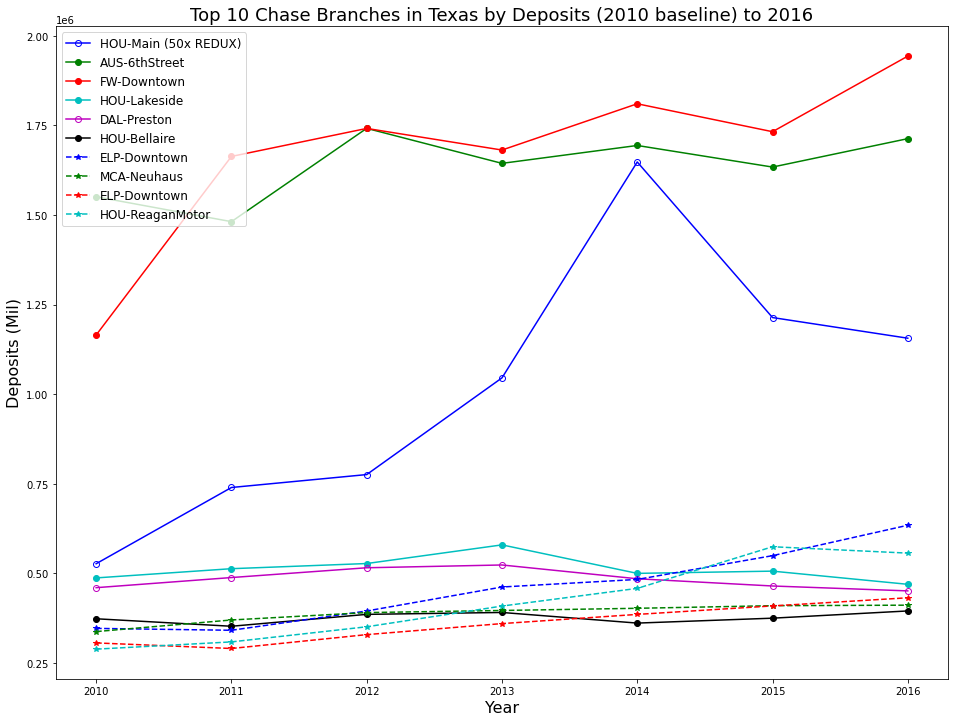

In [15]:
# Plot the Yearly Deposits for the Top 10 Branch Recipients (2010 Baseline)

# Create the Variables
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016]; # Convert Dates to Values
y1 = y['HOU-Main']*0.02 # Because HOU-Main is so much larger, we'll change the scale.
y2 = y['AUS-6thStreet']
y3 = y['FW-Downtown']
y4 = y['HOU-Lakeside']
y5 = y['DAL-Preston']
y6 = y['HOU-Bellaire']
y7 = y['ELP-Downtown']
y8 = y['MCA-Neuhaus']
y9 = y['HOU-Medical']
y10 = y['HOU-ReaganMotor']

# Create the Plot
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)

# Create the Axes
ax.plot(x,y1,c='b',marker="o",ls='-',label='HOU-Main (50x REDUX)',fillstyle='none')
ax.plot(x,y2,c='g',marker="o",ls='-',label='AUS-6thStreet')
ax.plot(x,y3,c='r',marker="o",ls='-',label='FW-Downtown')
ax.plot(x,y4,c='c',marker="o",ls='-',label='HOU-Lakeside')
ax.plot(x,y5,c='m',marker="o",ls='-',label='DAL-Preston',fillstyle='none')
ax.plot(x,y6,c='k',marker="o",ls='-',label='HOU-Bellaire')
ax.plot(x,y7,c='b',marker="*",ls='--',label='ELP-Downtown')
ax.plot(x,y8,c='g',marker="*",ls='--',label='MCA-Neuhaus')
ax.plot(x,y9,c='r',marker="*",ls='--',label='ELP-Downtown')
ax.plot(x,y10,c='c',marker="*",ls='--',label='HOU-ReaganMotor')

# Label the Plot
plt.title('Top 10 Chase Branches in Texas by Deposits (2010 baseline) to 2016', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Deposits (Mil)', fontsize = 16)
 
# Generate a Legend
plt.legend(loc=2, fontsize = 12)

# Display the Graph
plt.show()

As can be seen, the branches that made the biggest jumps in deposits were HOU-Main, FW-Downtown, and MCA-Neuhaus. HOU-Lakeside was relatively flat and DAL-Preston actually declined slightly.

If the author were to make a guess as to why HOU-Main, FW-Downtown and MCA-Neuhaus had the biggest jumps in deposits, the author would suppose the increases were due to (a) population growth (b) cross-border trade with Mexico and (c) increased economic activity, particularly in the energy and defense sectors for which Houston (a,c) McAllen (b) and Fort Worth (a,c) are known.

Let's conduct a similar analysis for another state with different demographics and economic forces: Michigan.

In [16]:
# Create a subset for all the Chase bank branches in Michigan
df_CHASE2_MI = df_CHASE2[df_CHASE2['State'].str.match('MI')]
df_CHASE2_MI.head()

,Main Office,Branch Name,Branch Number,Established Date,Acquired Date,Street Address,City,County,State,Zipcode,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
1401,0,Detroit Main Branch,2616,03/24/1933,11/13/2004,611 Woodward Avenue,Detroit,Wayne,MI,48226,42.33072,-83.04635,6953356.0,10480927.0,12544817.0,14030471.0,18121683.0,18855647.0,19499502
1402,0,Belleville Branch,2617,11/01/1956,11/13/2004,465 Main Street,Belleville,Wayne,MI,48111,42.20885,-83.49158,86861.0,89879.0,96769.0,101922.0,107263.0,113358.0,120860
1403,0,West Maple-Inkster Road Branch,2619,08/27/1962,11/13/2004,4860 West Maple Road,Bloomfield Hills,Oakland,MI,48301,42.54393,-83.32032,73387.0,79164.0,91114.0,100437.0,103089.0,106686.0,120976
1404,0,Groesbeck-Metropolitan Branch,2620,09/10/1965,11/13/2004,20755 Nunneley Road,Clinton Township,Macomb,MI,48036,42.56965,-82.91046,55737.0,60018.0,63616.0,66046.0,66858.0,83226.0,87558
1405,0,Ford Road-Outer Drive Branch,2621,12/05/1960,11/13/2004,23210 Ford Road,Dearborn Heights,Wayne,MI,48127,42.32703,-83.26276,98958.0,109403.0,122108.0,145699.0,157586.0,173646.0,188795


In [17]:
# Create a map of Michigan
import folium
MICH_map = folium.Map([44.979, -84.516], zoom_start=6.25)
MICH_map

Now let's plot the Chase branch locations in Michigan.

In [18]:
# Remove Locations without Latitude or Longitude values
df_CHASE2_MI = df_CHASE2_MI.dropna()

# Add Chase Locations to Michigan Map
for i in range(0,len(df_CHASE2_MI)):
    folium.Marker([df_CHASE2_MI.iloc[i]['Latitude'], df_CHASE2_MI.iloc[i]['Longitude']], 
                  popup=df_CHASE2_MI.iloc[i]['Branch Name']).add_to(MICH_map)

# Re-Display Michigan Map
MICH_map

Again as before, now that we have shown the Chase Bank branches in Michigan, let's take a look at the range of deposits in 2010 by branch in Michigan. Then we will compare them to the deposits in 2016.

In [19]:
# Sort all the Chase branches in Texas by 2010 deposits
df_CHASE2_MI_Deposits = df_CHASE2_MI[['Branch Name', 'City', 'County', '2010 Deposits']];
df_CHASE2_MI_Deposits = df_CHASE2_MI_Deposits.sort_values(by=['2010 Deposits'], ascending=False)
print('Top 10 Chase Branches in Michigan by Deposits, 2010\n')
print(df_CHASE2_MI_Deposits.head(10))

Top 10 Chase Branches in Michigan by Deposits, 2010

                            Branch Name              City     County  \
1401                Detroit Main Branch           Detroit      Wayne   
1428         Kercheval-St. Clair Branch     Grosse Pointe      Wayne   
1560          Grand Rapids Plaza Branch      Grand Rapids       Kent   
1466  West Long Lake + Telegraph Branch  Bloomfield Hills    Oakland   
1450        Van Dyke-Twelve Mile Branch            Warren     Macomb   
1500             Main Washington Branch         Ann Arbor  Washtenaw   
1452      N. Territorial Sheldon Branch          Plymouth      Wayne   
1492                 Fort Street Branch        Port Huron  St. Clair   
1603                    Somerset Branch              Troy    Oakland   
1469     Orchard Lake-Maple Road Branch   West Bloomfield    Oakland   

      2010 Deposits  
1401      6953356.0  
1428       465040.0  
1560       255468.0  
1466       218474.0  
1450       189332.0  
1500       188671.0  


As one might expect, the Detroit Main Branch handles the most deposits at $6,953,356 in 2010.

In [20]:
# Sort all the Chase branches in Texas by 2016 deposits
df_CHASE2_MI_Deposits = df_CHASE2_MI[['Branch Name', 'City', 'County', '2016 Deposits']];
df_CHASE2_MI_Deposits = df_CHASE2_MI_Deposits.sort_values(by=['2016 Deposits'], ascending=False)
print('Top 10 Chase Branches in Michigan by Deposits, 2016\n')
print(df_CHASE2_MI_Deposits.head(10))

Top 10 Chase Branches in Michigan by Deposits, 2016

                            Branch Name              City     County  \
1401                Detroit Main Branch           Detroit      Wayne   
1428         Kercheval-St. Clair Branch     Grosse Pointe      Wayne   
1560          Grand Rapids Plaza Branch      Grand Rapids       Kent   
1466  West Long Lake + Telegraph Branch  Bloomfield Hills    Oakland   
1603                    Somerset Branch              Troy    Oakland   
1469     Orchard Lake-Maple Road Branch   West Bloomfield    Oakland   
1452      N. Territorial Sheldon Branch          Plymouth      Wayne   
1504              Plymouth Green Branch         Ann Arbor  Washtenaw   
1463     Ford Road-Canton Center Branch            Canton      Wayne   
1438                        Novi Branch              Novi    Oakland   

      2016 Deposits  
1401       19499502  
1428         692589  
1560         348058  
1466         345579  
1603         334056  
1469         296561  


Interestingly, the Detroit Main Branch deposits dramatically increased by almost 3x from 2010 to 2016, with $19,499,502 deposited in 2016. A possible reason for this might be the improving conditions in the automobile industry over the same period.

Let's plot the change in deposit amounts for the top 10 recipients in 2010 to get a better sense of the change over the 6 year period.

In [21]:
# Create a Subset for plotting deposit amounts for the Top 10 Branch recipients in Michigan
df_CHASE2_MI_Deposits_2010 = df_CHASE2_MI[['2010 Deposits', '2011 Deposits', '2012 Deposits', '2013 Deposits', 
                                          '2014 Deposits', '2015 Deposits', '2016 Deposits']];
df_CHASE2_MI_Deposits_2010 = df_CHASE2_MI_Deposits_2010.sort_values(by=['2010 Deposits'], ascending=False)
df_CHASE2_MI_Deposits_2010_Top10 = df_CHASE2_MI_Deposits_2010.head(10);

# Transpose the Values for making the plots
df_CHASE2_MI_Deposits_2010_Top10_Transpose = df_CHASE2_MI_Deposits_2010_Top10.T
df_CMITop10 = df_CHASE2_MI_Deposits_2010_Top10_Transpose; #Shorten the Name
df_CMITop10.columns = ['DET-Main', 'GP-Kercheval', 'GR-Plaza', 'BH-WestLongLake', 'TROY-Somerset', 'WB-OrchardLake', 
                   'PLYM-Sheldon', 'AA-Plymouth', 'CTN-FordRoad', 'NOVI-Novi'];

yy = df_CMITop10

# Display Branch Values for Top 10 Deposit Recipients in Plot-Friendly Form
yy

,DET-Main,GP-Kercheval,GR-Plaza,BH-WestLongLake,TROY-Somerset,WB-OrchardLake,PLYM-Sheldon,AA-Plymouth,CTN-FordRoad,NOVI-Novi
2010 Deposits,6953356.0,465040.0,255468.0,218474.0,189332.0,188671.0,182613.0,170202.0,166197.0,159729.0
2011 Deposits,10480927.0,150203.0,257921.0,231744.0,173468.0,223704.0,197101.0,212960.0,191430.0,177129.0
2012 Deposits,12544817.0,154016.0,295967.0,264119.0,191178.0,216571.0,208629.0,213657.0,228825.0,189592.0
2013 Deposits,14030471.0,163053.0,376130.0,292929.0,201001.0,293650.0,236853.0,203034.0,227302.0,202082.0
2014 Deposits,18121683.0,168583.0,334312.0,290270.0,206045.0,223998.0,247956.0,171542.0,247469.0,229289.0
2015 Deposits,18855647.0,185071.0,349695.0,326536.0,238969.0,212635.0,270733.0,140714.0,268672.0,248475.0
2016 Deposits,19499502.0,692589.0,348058.0,345579.0,241926.0,238504.0,295187.0,136254.0,334056.0,296561.0


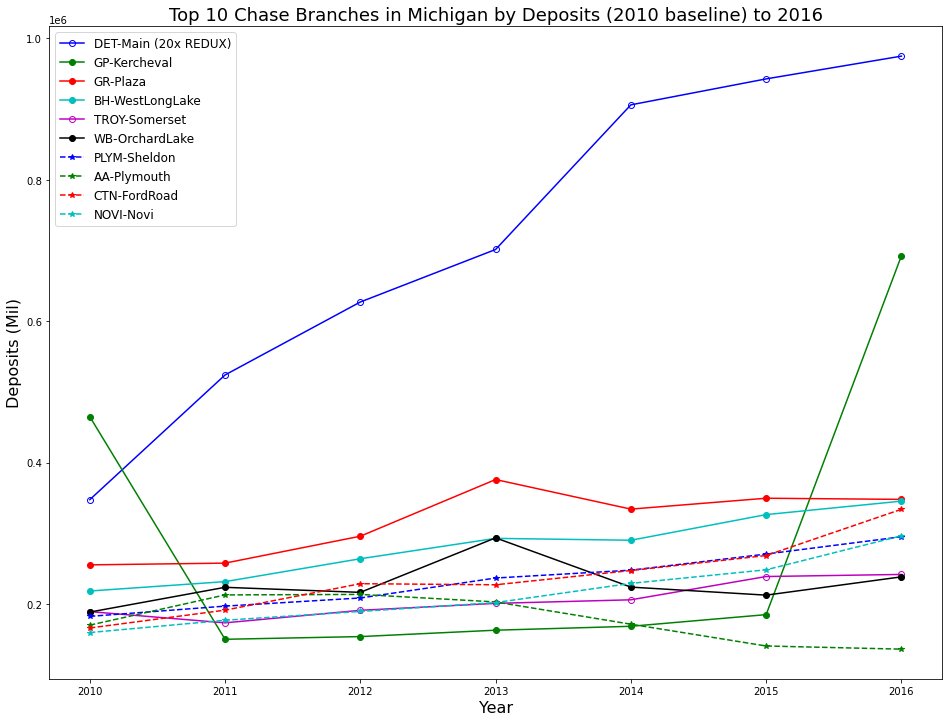

In [22]:
# Plot the Yearly Deposits for the Top 10 Branch Recipients (2010 Baseline)

# Create the Variables
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016]; # Convert Dates to Values
yy1 = yy['DET-Main']*0.05 # Because DET-Main is so much larger, we'll change the scale.
yy2 = yy['GP-Kercheval']
yy3 = yy['GR-Plaza']
yy4 = yy['BH-WestLongLake']
yy5 = yy['TROY-Somerset']
yy6 = yy['WB-OrchardLake']
yy7 = yy['PLYM-Sheldon']
yy8 = yy['AA-Plymouth']
yy9 = yy['CTN-FordRoad']
yy10 = yy['NOVI-Novi']

# Create the Plot
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)

# Create the Axes
ax.plot(x,yy1,c='b',marker="o",ls='-',label='DET-Main (20x REDUX)',fillstyle='none')
ax.plot(x,yy2,c='g',marker="o",ls='-',label='GP-Kercheval')
ax.plot(x,yy3,c='r',marker="o",ls='-',label='GR-Plaza')
ax.plot(x,yy4,c='c',marker="o",ls='-',label='BH-WestLongLake')
ax.plot(x,yy5,c='m',marker="o",ls='-',label='TROY-Somerset',fillstyle='none')
ax.plot(x,yy6,c='k',marker="o",ls='-',label='WB-OrchardLake')
ax.plot(x,yy7,c='b',marker="*",ls='--',label='PLYM-Sheldon')
ax.plot(x,yy8,c='g',marker="*",ls='--',label='AA-Plymouth')
ax.plot(x,yy9,c='r',marker="*",ls='--',label='CTN-FordRoad')
ax.plot(x,yy10,c='c',marker="*",ls='--',label='NOVI-Novi')

# Label the Plot
plt.title('Top 10 Chase Branches in Michigan by Deposits (2010 baseline) to 2016', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Deposits (Mil)', fontsize = 16)
 
# Generate a Legend
plt.legend(loc=2, fontsize = 12)

# Display the Graph
plt.show()

Looking at the plot above, the DET-Main saw a dramatic rise in deposits from 2010 to 2016. Other branches saw a overall small rise. Interestingly enough, the AA-Plymouth (Ann Arbor) saw a decline in deposits; The GP-Kercheval (Gross Pointe, a suburb of Detroit) also saw a spike in deposits from 2015 to 2016. It is unclear why these observations occurred and they deserve further study.

## Results and Discussion

In this open-ended project, we were able to arrive at some interesting results:

<ul>
    <li>(1) Nearly 2/3rds of Chase's branches were acquired rather than initiated.</li>
    <li>(2) In Texas, the Houston-Main Branch handles the most deposits and has seen increases from 2010-2016.</li>
    <li>(3) In Michigan, the Detroit-Main Branch handles the most deposits and has seen increases from 2010-2016.</li>
    <li>(4) There are no Chase branches in the upper peninsula of Michigan; there are no Chase branches in San Angelo or Corpus Christi, TX.</li>
</ul>

## Conclusion

The goal of this project was to explore deposit trends for Chase bank from 2010 to 2016. We were able to answer the questions about tracking deposits over time and where deposits were occurring for the states of Texas and Michigan. 

In this project, we were able to upload a real-world dataset, clean the data systematically, perform several different exploratory data analysis, make useful data visualizations, and draw logical inferences from those analyses. It is the author's hope that others find this exericse useful. Thanks for reading!